# COVID19-India-Analysis [Kaggle Notebook](https://www.kaggle.com/samacker77k/covid19-india-analysis)
A notebook dedicated to data visualization and analysis of COVID19 Pandemic in India.

---

This notebook visualizes the effects of COVID19 pandemic in India to help understand the effect of the outbreak demographically.

Maintained by:
* Shivani Tyagi [LinkedIn](https://www.linkedin.com/in/shivani-tyagi-09/) [Github](https://github.com/shivitg)
* Nitika Kamboj [LinkedIn](https://linkedin.com/in/nitika-kamboj) [Github](https://github.com/nitika-kamboj)
* Samar Srivastava [LinkedIn](https://linkedin.com/in/samacker77l) [Github](https://github.com/samacker77)
 


---

### Fetching Data 
---

In [14]:
import requests
import pandas as pd
import logging
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4)

### Enable logging

In [2]:
loggers = {}

def get_logger(name):
    
    global loggers

    if loggers.get(name):
        return loggers.get(name)
    else:
        logger = logging.getLogger(name)
        logger.setLevel(logging.DEBUG)
        now = datetime.datetime.now()
        handler = logging.StreamHandler()
        formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        loggers[name] = logger
        return logger
    
logger = get_logger('COVID19 India Analysis Logger')

In [3]:
def fetch_data():
    url = 'http://portal.covid19india.org/export?_export=json'
    response = requests.get(url=url)
    if response.status_code == 200:
        logger.info('Connection enabled. Fetching data...')
        fetched_data = response.json()
        data = pd.DataFrame(fetched_data)
        print("Data fetched.")
        return data
    else:
        print('Connection failed. Please retry.')
        return

In [4]:
data = fetch_data()

2020-03-24 15:07:18,598 INFO Connection enabled. Fetching data...


Data fetched.


---
#### Now we have fetched data successfully. Now we will inspect the data. 

In [5]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 504 | Columns = 19


#### Checking dtypes

In [6]:
data.dtypes

Age                    float64
Contacts                object
Created on              object
Current location        object
Current location pt     object
Current status          object
Detected city           object
Detected city pt        object
Detected district       object
Detected state          object
Diagnosed date          object
Gender                  object
Government id           object
ID                       int64
Nationality             object
Notes                   object
Status change date      object
Unique id               object
Updated on              object
dtype: object

> On first look we see that the attributes 'ID' and 'Unique ID' are same. So we check if they have any values that are different. Before that we convert 'Unique ID' to int64 and compare. 

In [7]:
data['Unique id'] = data['Unique id'].astype('int64')

In [8]:
data[data['ID'] == data['Unique id']]

Age                                           Contacts  \
0    20.0                                               None   
1     NaN                                               None   
2     NaN                                               None   
3    45.0  Patient 22:, Patient 23:, Patient 24:, Patient...   
4     NaN                                               None   
5    69.0  Patient 7:, Patient 8:, Patient 9:, Patient 10...   
6    55.0                                         Patient 6:   
7    55.0                                         Patient 6:   
8    55.0                                         Patient 6:   
9    55.0                                         Patient 6:   
10   55.0                                         Patient 6:   
11   55.0                                         Patient 6:   
12   55.0                                         Patient 6:   
13   55.0                                         Patient 6:   
14   55.0                                         Patient 6:   
15   55.0                                         Patient 6:   
16   55.0                                         Patient 6:   
17   55.0                                         Patient 6:   
18   55.0                                         Patient 6:   
19   55.0                                         Patient 6:   
20   70.0                                         Patient 6:   
21    NaN                       Patient 4:DL-P1, Patient 48:   
22    NaN                                    Patient 4:DL-P1   
23    NaN                                    Patient 4:DL-P1   
24    NaN                                    Patient 4:DL-P1   
25    NaN                                    Patient 4:DL-P1   
26    NaN                                    Patient 4:DL-P1   
27    NaN                                         Patient 6:   
28   27.0                                   Patient 40:DL-P4   
29   59.0                                        Patient 82:   
..    ...                                                ...   
474  60.0                                               None   
475  22.0                                               None   
476  38.0                                               None   
477   NaN                                               None   
478   NaN                                               None   
479   NaN                                               None   
480   NaN                                               None   
481   NaN                                               None   
482   NaN                                               None   
483  45.0                                               None   
484   NaN                                               None   
485  45.0                                               None   
486  69.0                                               None   
487   2.0                                  Patient 182:PJ-P2   
488   NaN                                               None   
489   NaN                                               None   
490   NaN                                               None   
491   NaN                                               None   
492  25.0                                               None   
493   NaN                                               None   
494   NaN                                               None   
495   NaN                                               None   
496   NaN                                               None   
497   NaN                                               None   
498   NaN                                               None   
499  25.0                                               None   
500  48.0                                               None   
501  54.0                                               None   
502  24.0                                               None   
503  35.0                                               None   

                Created on Current lo

> Since we have same values in both columns. We can drop one of them and make another as the index

In [9]:
data.drop('Unique id',axis=1,inplace=True)

In [10]:
data.set_index('ID',inplace=True)

In [11]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 504 | Columns = 17


In [12]:
data.head()

Age                                           Contacts  \
ID                                                            
1   20.0                                               None   
2    NaN                                               None   
3    NaN                                               None   
4   45.0  Patient 22:, Patient 23:, Patient 24:, Patient...   
5    NaN                                               None   

               Created on Current location  \
ID                                           
1   03/23/2020 12:20 p.m.             None   
2   03/23/2020 12:20 p.m.             None   
3   03/23/2020 12:20 p.m.             None   
4   03/23/2020 12:20 p.m.             None   
5   03/23/2020 12:20 p.m.             None   

                               Current location pt Current status  \
ID                                                                  
1   SRID=4326;POINT (76.21325419999999 10.5256264)      Recovered   
2    SRID=4326;POINT (76.333482 9.498000100000001)      Recovered   
3                          SRID=4326;POINT (80 20)      Recovered   
4                          SRID=4326;POINT (80 20)      Recovered   
5    SRID=4326;POINT (78.4349398685041 17.4263524)      Recovered   

               Detected city                                Detected city pt  \
ID                                                                             
1                   Thrissur  SRID=4326;POINT (76.21325419999999 10.5256264)   
2                  Alappuzha   SRID=4326;POINT (76.333482 9.498000100000001)   
3                  Kasargode                         SRID=4326;POINT (80 20)   
4   East Delhi (Mayur Vihar)                         SRID=4326;POINT (80 20)   
5                  Hyderabad   SRID=4326;POINT (78.4349398685041 17.4263524)   

   Detected district Detected state Diagnosed date   Gender Government id  \
ID                                                                          
1           Thrissur         Kerala    30/Jan/2020   Female      KL-TS-P1   
2          Alappuzha         Kerala    02/Feb/2020  Unknown      KL-AL-P1   
3          Kasaragod         Kerala    03/Feb/2020  Unknown      KL-KS-P1   
4         East Delhi          Delhi    02/Mar/2020     Male         DL-P1   
5          Hyderabad      Telangana    02/Mar/2020  Unknown         TS-P1   

   Nationality                                              Notes  \
ID                                                                  
1        India          Travelled from Wuhan.\nStudent from Wuhan   
2        India          Travelled from Wuhan.\nStudent from Wuhan   
3        India          Travelled from Wuhan.\nStudent from Wuhan   
4        India  Travelled from Austria, Italy.\nTravel history...   
5        India  Travelled from Dubai, Singapore contact.\nTrav...   

   Status change date             Updated on  
ID                                            
1          02/14/2020  03/23/2020 12:20 p.m.  
2          02/14/2020  03/23/2020 12:20 p.m.  
3          02/14/2020  03/23/2020 12:20 p.m.  
4          03/15/2020  03/23/2020 12:20 p.m.  
5          03/02/2020  03/23/2020 12:20 p.m.

#### Now the data is ready for analysis and preprocessing

> Graph between the count of affected people and Nationality.

In [15]:
data['Nationality'].value_counts()

India             307
Italy              18
Indonesia          10
United Kingdom      7
Indian              2
Phillipines         2
Thailand            2
Canada              1
Name: Nationality, dtype: int64

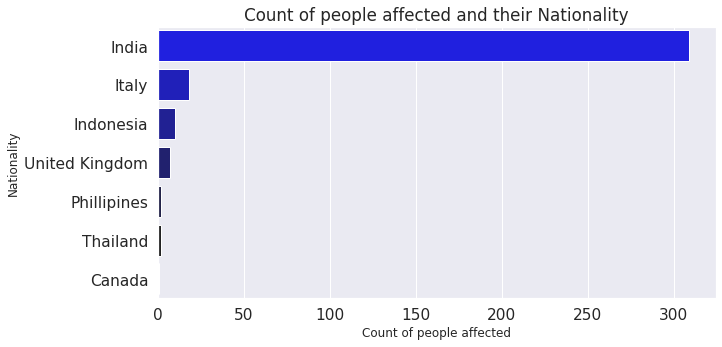

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data['Nationality'].value_counts().values,data['Nationality'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Nationality')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

> We can see from above graph that 'India' and 'Indian' are same nationality. We can replace 'Indian' with 'India'

In [61]:
data['Nationality']=data['Nationality'].replace('Indian','India')

In [62]:
data['Nationality'].value_counts()

India             309
Italy              18
Indonesia          10
United Kingdom      7
Phillipines         2
Thailand            2
Canada              1
Name: Nationality, dtype: int64

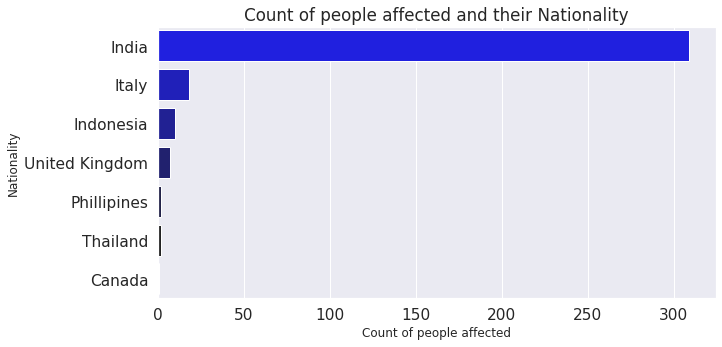

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(data['Nationality'].value_counts().values,data['Nationality'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Nationality')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

> Graph between gender and count of affected people.

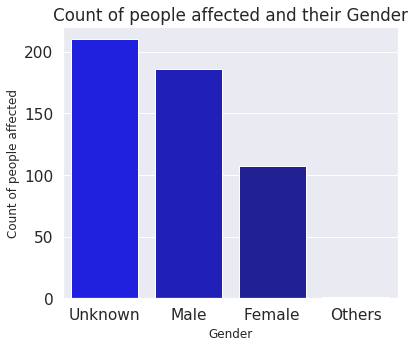

In [68]:
plt.figure(figsize=(6,5))
sns.barplot(data['Gender'].value_counts().index,data['Gender'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Gender')
plt.ylabel('Count of people affected', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

> Graph between different states and number of detected cases.

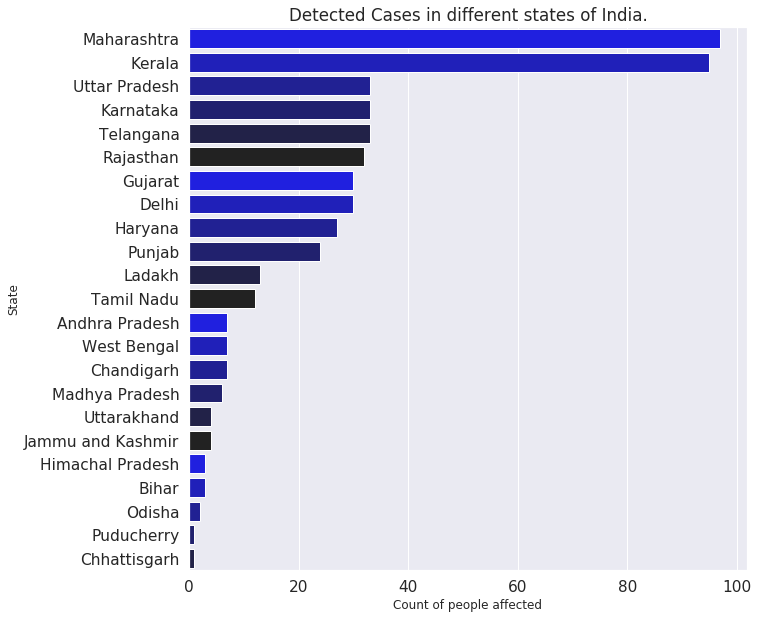

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(data['Detected state'].value_counts().values,data['Detected state'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Detected Cases in different states of India.')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

> Graph displaying status and count of affected people.

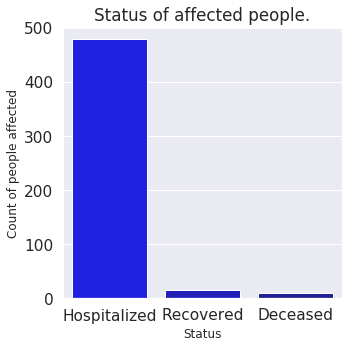

In [74]:
plt.figure(figsize=(5,5))
sns.barplot(data['Current status'].value_counts().index,data['Current status'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
plt.title('Status of affected people.')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count of people affected', fontsize=12)
plt.show()

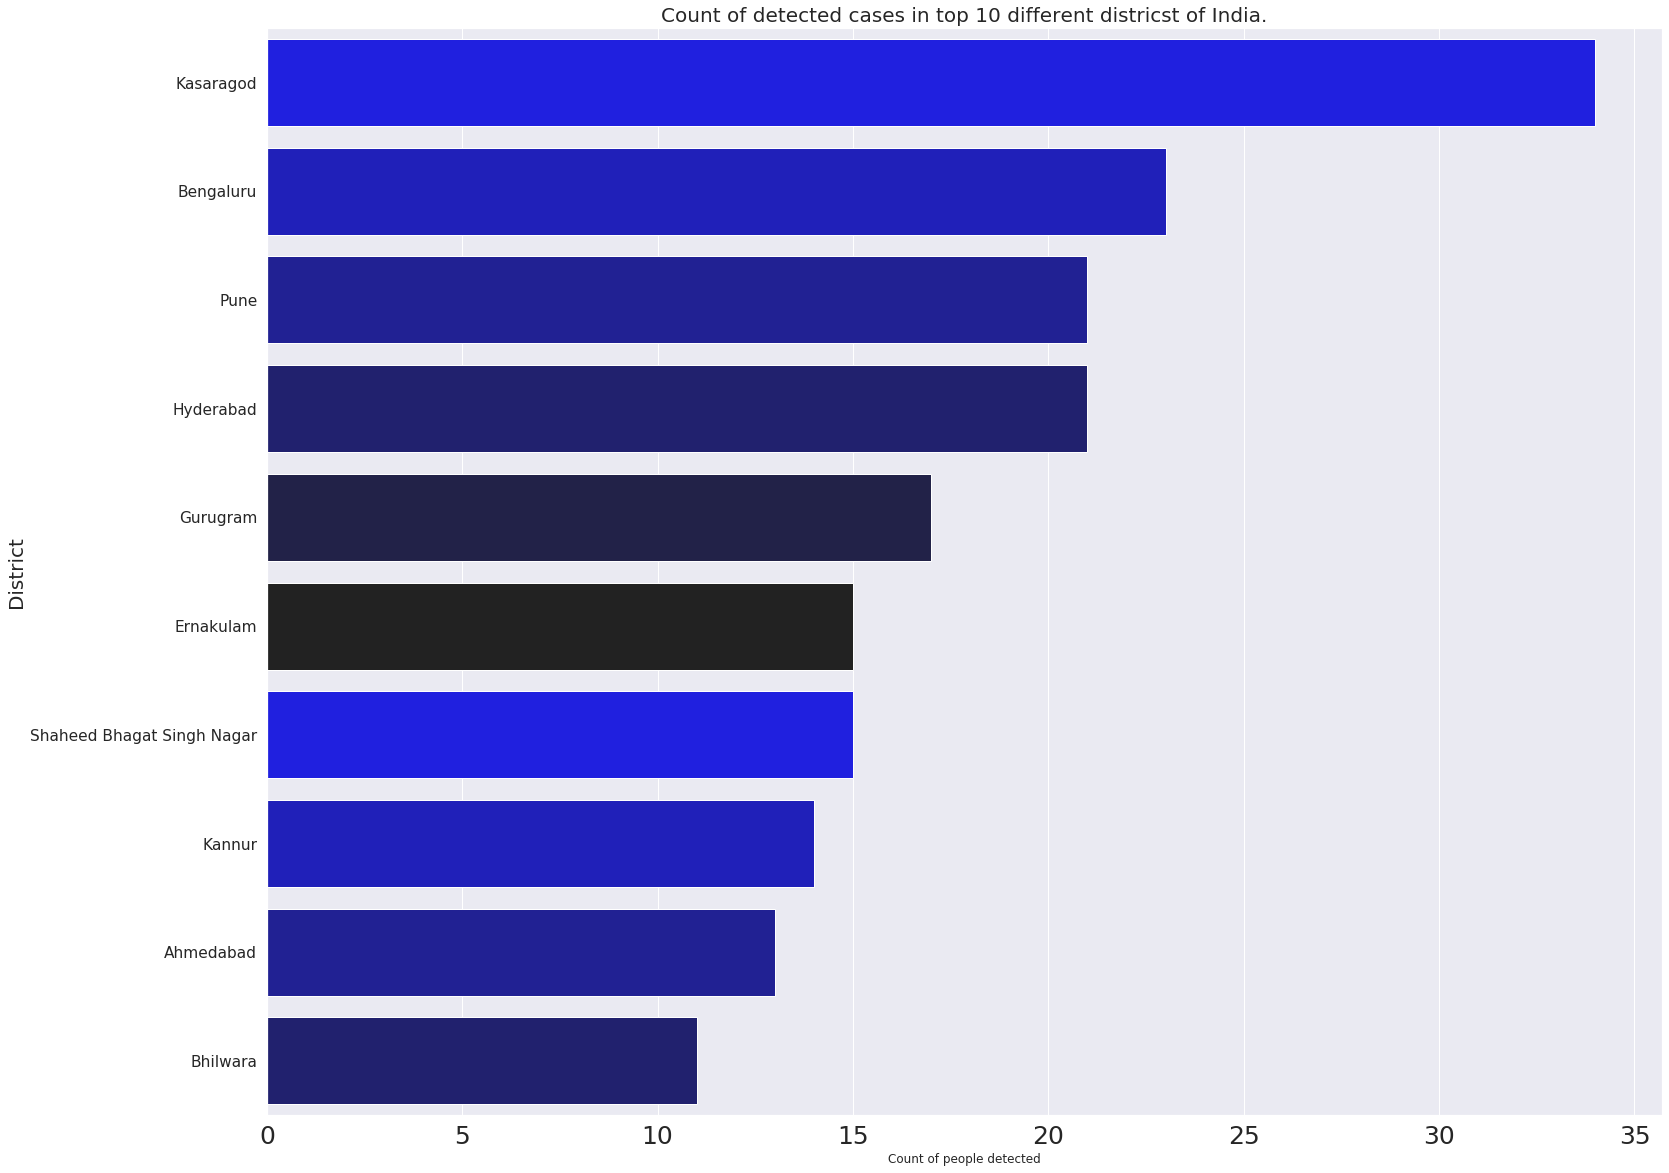

In [105]:
plt.figure(figsize=(25,20))
sns.barplot(data['Detected district'].value_counts()[:10].values,data['Detected district'].value_counts()[:10].index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of detected cases in top 10 different districst of India.',fontsize=20)
plt.xlabel('Count of people detected', fontsize=12)
plt.ylabel('District', fontsize=20)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.show()

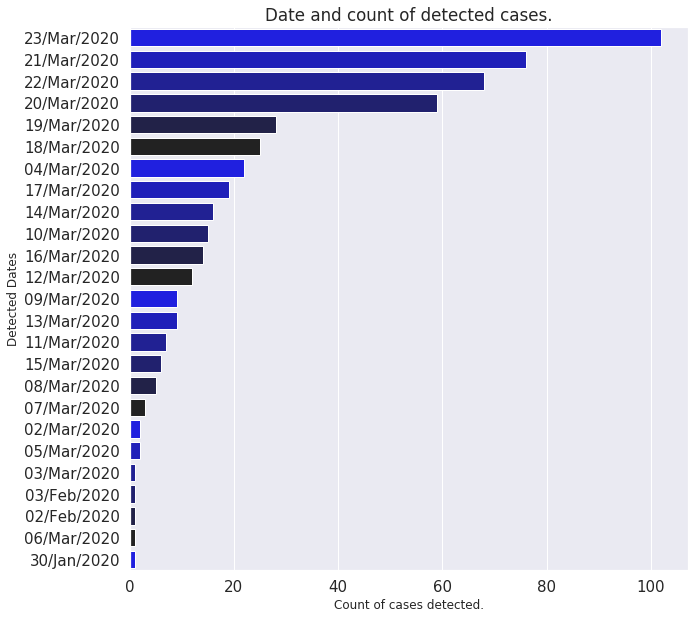

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(data['Diagnosed date'].value_counts().values,data['Diagnosed date'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Date and count of detected cases.')
plt.xlabel('Count of cases detected.', fontsize=12)
plt.ylabel('Detected Dates', fontsize=12)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

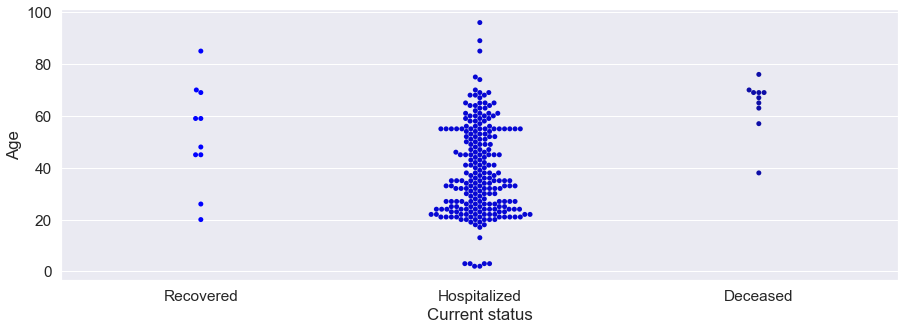

In [211]:
plt.figure(figsize=(15,5))
sns.swarmplot(data['Current status'],data['Age'],palette=sns.dark_palette("blue", reverse=True))


> ! This graph shows that the majority of people of hospitalized are in the age group of 20 - 79, and the deceased are the ones in the age group 60 - 80.

#### No. of days between change in status

In [225]:
data.head()

Government id Diagnosed date   Age   Gender             Detected city  \
ID                                                                         
1       KL-TS-P1     2020-01-30  20.0   Female                  Thrissur   
2       KL-AL-P1     2020-02-02   NaN  Unknown                 Alappuzha   
3       KL-KS-P1     2020-02-03   NaN  Unknown                 Kasargode   
4          DL-P1     2020-03-02  45.0     Male  East Delhi (Mayur Vihar)   
5          TS-P1     2020-03-02   NaN  Unknown                 Hyderabad   

                                  Detected city pt Detected district  \
ID                                                                     
1   SRID=4326;POINT (76.21325419999999 10.5256264)          Thrissur   
2    SRID=4326;POINT (76.333482 9.498000100000001)         Alappuzha   
3                          SRID=4326;POINT (80 20)         Kasaragod   
4                          SRID=4326;POINT (80 20)        East Delhi   
5    SRID=4326;POINT (78.4349398685041 17.4263524)         Hyderabad   

   Detected state Nationality Current status Status change date  \
ID                                                                
1          Kerala       India      Recovered         02/14/2020   
2          Kerala       India      Recovered         02/14/2020   
3          Kerala       India      Recovered         02/14/2020   
4           Delhi       India      Recovered         03/15/2020   
5       Telangana       India      Recovered         03/02/2020   

                                                Notes Current location  \
ID                                                                       
1           Travelled from Wuhan.\nStudent from Wuhan             None   
2           Travelled from Wuhan.\nStudent from Wuhan             None   
3           Travelled from Wuhan.\nStudent from Wuhan             None   
4   Travelled from Austria, Italy.\nTravel history...             None   
5   Travelled from Dubai, Singapore contact.\nTrav...             None   

                               Current location pt             Created on  \
ID                                                                          
1   SRID=4326;POINT (76.21325419999999 10.5256264)  03/23/2020 12:20 p.m.   
2    SRID=4326;POINT (76.333482 9.498000100000001)  03/23/2020 12:20 p.m.   
3                          SRID=4326;POINT (80 20)  03/23/2020 12:20 p.m.   
4                          SRID=4326;POINT (80 20)  03/23/2020 12:20 p.m.   
5    SRID=4326;POINT (78.4349398685041 17.4263524)  03/23/2020 12:20 p.m.   

               Updated on                                           Contacts  \
ID                                                                             
1   03/23/2020 12:20 p.m.                                               None   
2   03/23/2020 12:20 p.m.                                               None   
3   03/23/2020 12:20 p.m.                                               None   
4   03/23/2020 12:20 p.m.  Patient 22:, Patient 23:, Patient 24:, Patient...   
5   03/23/2020 12:20 p.m.                                               None   

   status change difference  
ID                           
1                   15 days  
2                   12 days  
3                   11 days  
4                   13 days  
5                    0 days

#### Days taken to change status(Hospitalized/Death/Recover)

In [224]:
data['status change difference'] = pd.to_datetime(data['Status change date'])-pd.to_datetime(data['Diagnosed date'])

In [236]:
data['status change difference'].astype('str')

ID
1        15 days 00:00:00.000000000
2        12 days 00:00:00.000000000
3        11 days 00:00:00.000000000
4        13 days 00:00:00.000000000
5         0 days 00:00:00.000000000
                   ...             
500    -29 days +00:00:00.000000000
501    -29 days +00:00:00.000000000
502    -29 days +00:00:00.000000000
503    -29 days +00:00:00.000000000
504    -29 days +00:00:00.000000000
Name: status change difference, Length: 504, dtype: object

In [237]:
data.tail()

Government id Diagnosed date   Age Gender Detected city  \
ID                                                            
500          None     2020-03-23  25.0   Male       Chennai   
501          None     2020-03-23  48.0   Male      Tiruppur   
502          None     2020-03-23  54.0   Male       Madurai   
503          None     2020-03-23  24.0   Male          None   
504          None     2020-03-23  35.0   Male       Jaunpur   

                                      Detected city pt Detected district  \
ID                                                                         
500            SRID=4326;POINT (80.2838331 13.0801721)           Chennai   
501    SRID=4326;POINT (77.52604780096844 10.78322705)          Tiruppur   
502  SRID=4326;POINT (78.11409829999999 9.926115299...           Madurai   
503             SRID=4326;POINT (85.906508 25.6440845)             Patna   
504     SRID=4326;POINT (82.48834097504385 25.7955927)          Varanasi   

    Detected state Nationality Current status Status change date  \
ID                                                                 
500     Tamil Nadu        None   Hospitalized         02/23/2020   
501     Tamil Nadu        None   Hospitalized         02/23/2020   
502     Tamil Nadu        None   Hospitalized         02/23/2020   
503          Bihar        None   Hospitalized         02/23/2020   
504  Uttar Pradesh        None   Hospitalized         02/23/2020   

                                                 Notes Current location  \
ID                                                                        
500                       Travelled from London - RGGH             None   
501                        Travelled from London - ESI             None   
502  Annanagar at Rajaji Hosp. No mention of travel...             None   
503                            Travelled from Scotland             None   
504  Travelled from Saudi Arabia on 15th Mar; Sympt...             None   

                                   Current location pt            Created on  \
ID                                                                             
500            SRID=4326;POINT (80.2838331 13.0801721)  03/24/2020 8:15 a.m.   
501    SRID=4326;POINT (77.52604780096844 10.78322705)  03/24/2020 8:15 a.m.   
502  SRID=4326;POINT (78.11409829999999 9.926115299...  03/24/2020 8:15 a.m.   
503             SRID=4326;POINT (85.906508 25.6440845)  03/24/2020 8:15 a.m.   
504     SRID=4326;POINT (82.48834097504385 25.7955927)  03/24/2020 8:15 a.m.   

               Updated on Contacts status change difference  
ID                                                           
500  03/24/2020 8:15 a.m.     None                 -29 days  
501  03/24/2020 8:15 a.m.     None                 -29 days  
502  03/24/2020 8:15 a.m.     None                 -29 days  
503  03/24/2020 8:15 a.m.     None                 -29 days  
504  03/24/2020 8:15 a.m.     None                 -29 days

In [238]:
pd.to_datetime(data['Diagnosed date'])

ID
1     2020-01-30
2     2020-02-02
3     2020-02-03
4     2020-03-02
5     2020-03-02
         ...    
500   2020-03-23
501   2020-03-23
502   2020-03-23
503   2020-03-23
504   2020-03-23
Name: Diagnosed date, Length: 504, dtype: datetime64[ns]

In [239]:
pd.to_datetime(data['Status change date'])

ID
1     2020-02-14
2     2020-02-14
3     2020-02-14
4     2020-03-15
5     2020-03-02
         ...    
500   2020-02-23
501   2020-02-23
502   2020-02-23
503   2020-02-23
504   2020-02-23
Name: Status change date, Length: 504, dtype: datetime64[ns]

In [243]:
data['status change difference'].value_counts()

0 days      389
-29 days    102
1 days        3
8 days        2
3 days        1
9 days        1
12 days       1
15 days       1
10 days       1
13 days       1
2 days        1
11 days       1
Name: status change difference, dtype: int64

### As we can see that many of the dates in the 'Status Change Date' are incorrect due to which the status change difference comes out to be negative.

---

In [245]:
data.drop('status change difference',axis=1,inplace=True
         )

In [246]:
data.head()

Government id Diagnosed date   Age   Gender             Detected city  \
ID                                                                         
1       KL-TS-P1     2020-01-30  20.0   Female                  Thrissur   
2       KL-AL-P1     2020-02-02   NaN  Unknown                 Alappuzha   
3       KL-KS-P1     2020-02-03   NaN  Unknown                 Kasargode   
4          DL-P1     2020-03-02  45.0     Male  East Delhi (Mayur Vihar)   
5          TS-P1     2020-03-02   NaN  Unknown                 Hyderabad   

                                  Detected city pt Detected district  \
ID                                                                     
1   SRID=4326;POINT (76.21325419999999 10.5256264)          Thrissur   
2    SRID=4326;POINT (76.333482 9.498000100000001)         Alappuzha   
3                          SRID=4326;POINT (80 20)         Kasaragod   
4                          SRID=4326;POINT (80 20)        East Delhi   
5    SRID=4326;POINT (78.4349398685041 17.4263524)         Hyderabad   

   Detected state Nationality Current status Status change date  \
ID                                                                
1          Kerala       India      Recovered         02/14/2020   
2          Kerala       India      Recovered         02/14/2020   
3          Kerala       India      Recovered         02/14/2020   
4           Delhi       India      Recovered         03/15/2020   
5       Telangana       India      Recovered         03/02/2020   

                                                Notes Current location  \
ID                                                                       
1           Travelled from Wuhan.\nStudent from Wuhan             None   
2           Travelled from Wuhan.\nStudent from Wuhan             None   
3           Travelled from Wuhan.\nStudent from Wuhan             None   
4   Travelled from Austria, Italy.\nTravel history...             None   
5   Travelled from Dubai, Singapore contact.\nTrav...             None   

                               Current location pt             Created on  \
ID                                                                          
1   SRID=4326;POINT (76.21325419999999 10.5256264)  03/23/2020 12:20 p.m.   
2    SRID=4326;POINT (76.333482 9.498000100000001)  03/23/2020 12:20 p.m.   
3                          SRID=4326;POINT (80 20)  03/23/2020 12:20 p.m.   
4                          SRID=4326;POINT (80 20)  03/23/2020 12:20 p.m.   
5    SRID=4326;POINT (78.4349398685041 17.4263524)  03/23/2020 12:20 p.m.   

               Updated on                                           Contacts  
ID                                                                            
1   03/23/2020 12:20 p.m.                                               None  
2   03/23/2020 12:20 p.m.                                               None  
3   03/23/2020 12:20 p.m.                                               None  
4   03/23/2020 12:20 p.m.  Patient 22:, Patient 23:, Patient 24:, Patient...  
5   03/23/2020 12:20 p.m.                                               None

In [257]:
data['Transmission info'] = data['Contacts'].apply(lambda x : False if x == None else True)

In [258]:
data.head()

Government id Diagnosed date   Age   Gender             Detected city  \
ID                                                                         
1       KL-TS-P1     2020-01-30  20.0   Female                  Thrissur   
2       KL-AL-P1     2020-02-02   NaN  Unknown                 Alappuzha   
3       KL-KS-P1     2020-02-03   NaN  Unknown                 Kasargode   
4          DL-P1     2020-03-02  45.0     Male  East Delhi (Mayur Vihar)   
5          TS-P1     2020-03-02   NaN  Unknown                 Hyderabad   

                                  Detected city pt Detected district  \
ID                                                                     
1   SRID=4326;POINT (76.21325419999999 10.5256264)          Thrissur   
2    SRID=4326;POINT (76.333482 9.498000100000001)         Alappuzha   
3                          SRID=4326;POINT (80 20)         Kasaragod   
4                          SRID=4326;POINT (80 20)        East Delhi   
5    SRID=4326;POINT (78.4349398685041 17.4263524)         Hyderabad   

   Detected state Nationality Current status Status change date  \
ID                                                                
1          Kerala       India      Recovered         02/14/2020   
2          Kerala       India      Recovered         02/14/2020   
3          Kerala       India      Recovered         02/14/2020   
4           Delhi       India      Recovered         03/15/2020   
5       Telangana       India      Recovered         03/02/2020   

                                                Notes Current location  \
ID                                                                       
1           Travelled from Wuhan.\nStudent from Wuhan             None   
2           Travelled from Wuhan.\nStudent from Wuhan             None   
3           Travelled from Wuhan.\nStudent from Wuhan             None   
4   Travelled from Austria, Italy.\nTravel history...             None   
5   Travelled from Dubai, Singapore contact.\nTrav...             None   

                               Current location pt             Created on  \
ID                                                                          
1   SRID=4326;POINT (76.21325419999999 10.5256264)  03/23/2020 12:20 p.m.   
2    SRID=4326;POINT (76.333482 9.498000100000001)  03/23/2020 12:20 p.m.   
3                          SRID=4326;POINT (80 20)  03/23/2020 12:20 p.m.   
4                          SRID=4326;POINT (80 20)  03/23/2020 12:20 p.m.   
5    SRID=4326;POINT (78.4349398685041 17.4263524)  03/23/2020 12:20 p.m.   

               Updated on                                           Contacts  \
ID                                                                             
1   03/23/2020 12:20 p.m.                                               None   
2   03/23/2020 12:20 p.m.                                               None   
3   03/23/2020 12:20 p.m.                                               None   
4   03/23/2020 12:20 p.m.  Patient 22:, Patient 23:, Patient 24:, Patient...   
5   03/23/2020 12:20 p.m.                                               None   

    Transmission info  
ID                     
1               False  
2               False  
3               False  
4                True  
5               False

In [259]:
data['Transmission info'].value_counts()

False    357
True     147
Name: Transmission info, dtype: int64

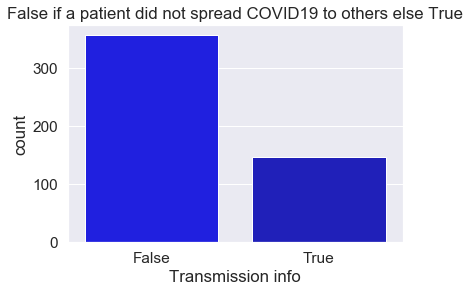

In [268]:
plt.title('False if a patient did not spread COVID19 to others else True')
sns.countplot(data['Transmission info'],palette=sns.dark_palette('blue',reverse=True))

> We can estimate how many people are carriers of COVID19

In [274]:
print("COVID19 estimated to be spread by {} people".format(data['Transmission info'].value_counts()[1]))

COVID19 estimated to be spread by 147 people


In [291]:
X = data['Diagnosed date'].value_counts().index
Y = data['Diagnosed date'].value_counts().values

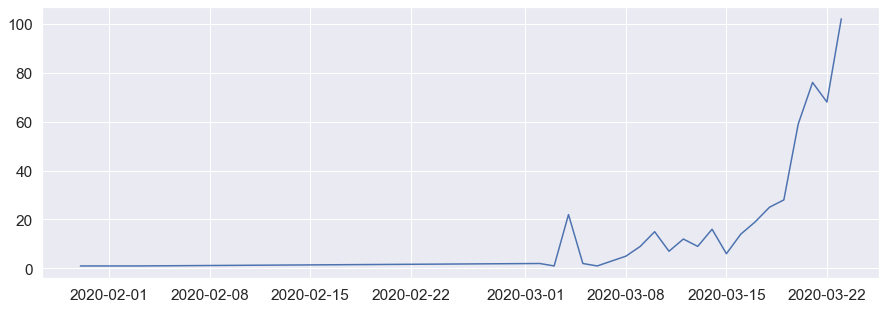

In [297]:
plt.figure(figsize=(15,5))
sns.lineplot(X,Y)